In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            404290 non-null  int64
 1   qid1          404290 non-null  int64
 2   qid2          404290 non-null  int64
 3   question1     404289 non-null  str  
 4   question2     404288 non-null  str  
 5   is_duplicate  404290 non-null  int64
dtypes: int64(4), str(2)
memory usage: 18.5 MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


In [8]:
print(df['is_duplicate'].value_counts()/len(df)*100) # so the data is imbalanced

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

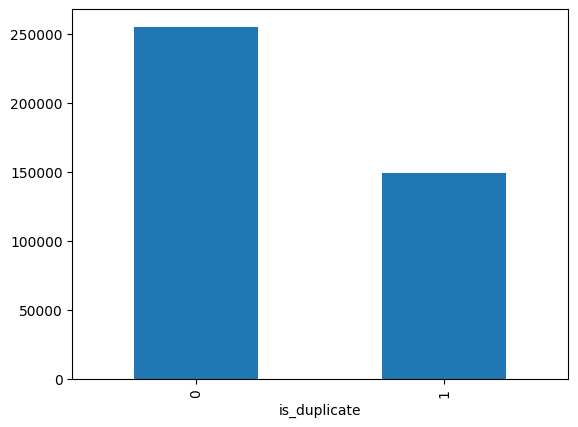

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Total number of questions: {}'.format(len(qid)))
print('Number of unique questions:', qid.nunique())

Total number of questions: 808580
Number of unique questions: 537933


Text(0.5, 0, 'Number of times a question is repeated')

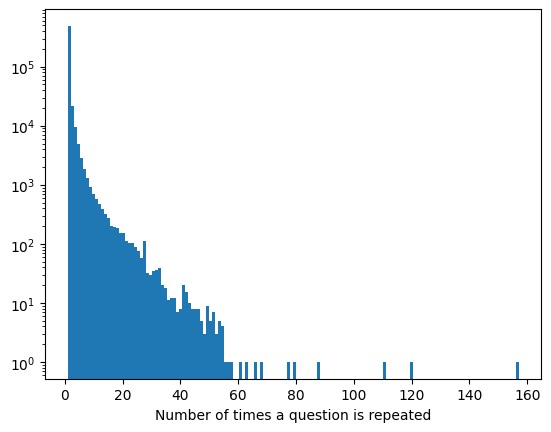

In [11]:
import matplotlib.pyplot as plt

plt.hist(qid.value_counts(), bins=150)
plt.yscale('log')
plt.xlabel('Number of times a question is repeated')

In [12]:
# now i am going to try only bow 

df.shape # i cannot use all the data bcs it is too big, we will use only 50k

(404290, 6)

In [13]:
new_df = df.sample(20000, random_state=42)
new_df.shape

(20000, 6)

In [14]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
brand_new_df = new_df[['question1', 'question2']]

In [16]:
brand_new_df.head()

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)

In [18]:
questions = brand_new_df['question1'].tolist() + brand_new_df['question2'].tolist()

In [19]:
X = cv.fit_transform(questions)
q1_bow,q2_bow = np.vsplit(X.toarray(),2)

In [20]:
temp_df1 = pd.DataFrame(q1_bow, index = brand_new_df.index)
temp_df2 = pd.DataFrame(q2_bow,index=brand_new_df.index)

In [21]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 4000)

In [22]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
360359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [24]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,is_duplicate
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
122594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
360359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.drop('is_duplicate', axis=1), temp_df.iloc[:, -1], test_size=0.2, random_state=42)

In [29]:
# we are applying random forest classifier and xgb on data without doing anything
# to see how it performs 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.738

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train.values, y_train.values)
y_pred = xgb.predict(X_test.values)
accuracy_score(y_test, y_pred)

0.7245

In [36]:
# we are going to add some features to the data and see how it performs

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [37]:
new_df['len_q1'] = new_df['question1'].apply(lambda x: len(x))
new_df['len_q2'] = new_df['question2'].apply(lambda x: len(x))

In [38]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29


In [44]:
new_df['num_word_q1'] = new_df['question1'].apply(lambda x: len(x.split()))
new_df['num_word_q2'] = new_df['question2'].apply(lambda x: len(x.split()))

In [45]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,num_word_q1,num_word_q2
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7


In [47]:
new_df['word_common'] = new_df[['question1', 'question2']].apply(
	lambda x: len(set(str(x['question1']).split()) & set(str(x['question2']).split())),
	axis=1
)

In [48]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,num_word_q1,num_word_q2,word_common
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,2


In [49]:
new_df['word_total'] = new_df[['question1', 'question2']].apply(
    lambda x: len(set(str(x['question1']).split()) | set(str(x['question2']).split())),
    axis=1
)

In [50]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,num_word_q1,num_word_q2,word_common,word_total
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,9
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,14
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,22
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,12
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,2,14


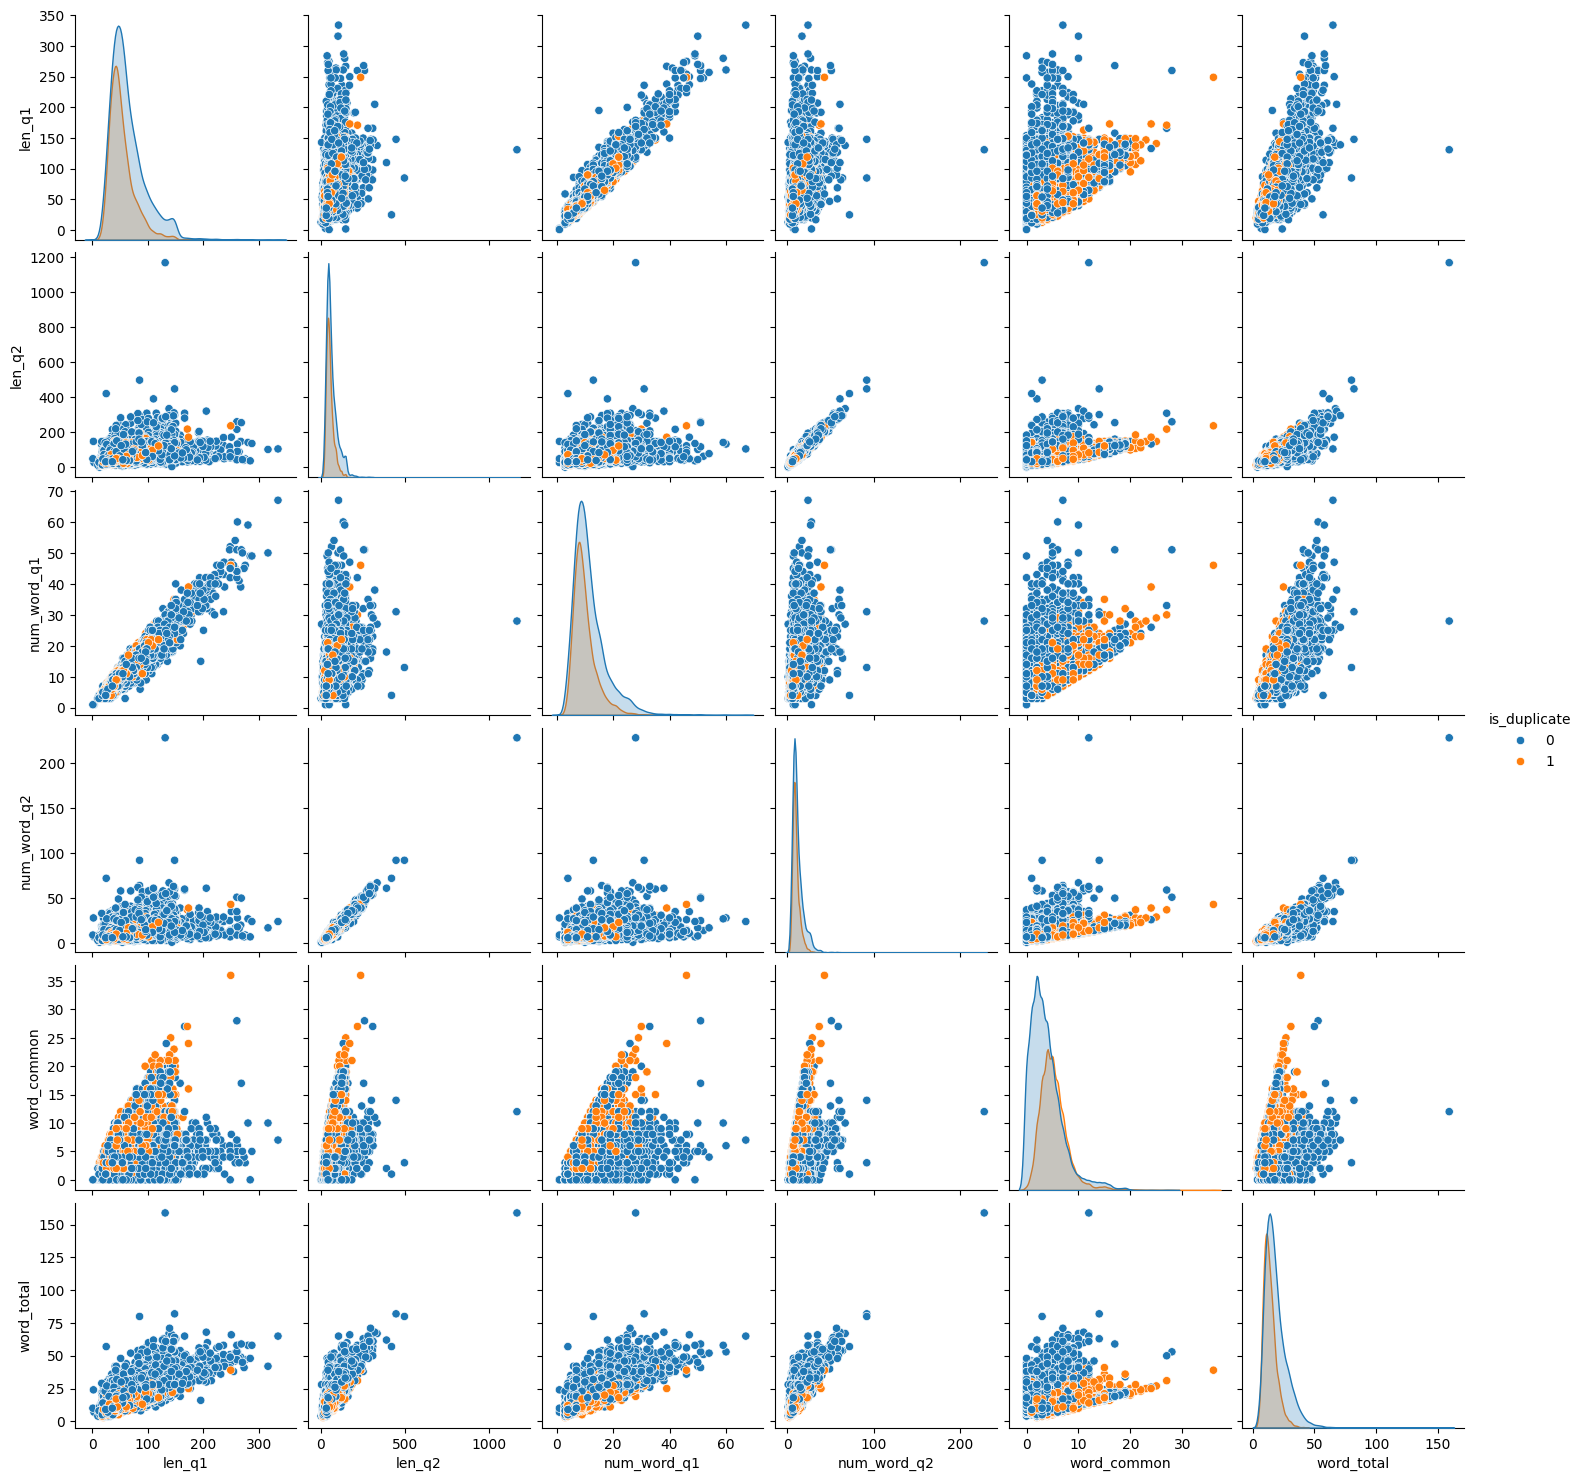

In [52]:
import seaborn as sns

sns.pairplot(new_df[['len_q1', 'len_q2', 'num_word_q1', 'num_word_q2', 'word_common', 'word_total', 'is_duplicate']], hue='is_duplicate')

In [53]:
bag_df = new_df[['question1', 'question2']]
bag_df.head()

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [54]:
final_df = new_df.drop(['question1', 'question2'], axis=1)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)

In [57]:
X = cv.fit_transform(bag_df['question1'].tolist() + bag_df['question2'].tolist())

In [58]:
ques_1, ques_2 = np.vsplit(X.toarray(), 2)

In [59]:
temp_df1 = pd.DataFrame(ques_1, index=final_df.index)
temp_df2 = pd.DataFrame(ques_2, index=final_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
final_df = new_df.drop(['id', 'qid1', 'qid2', 'question1', 'question2'], axis=1)
final_df.head()

,is_duplicate,len_q1,len_q2,num_word_q1,num_word_q2,word_common,word_total
8067,0,34,34,8,8,7,9
368101,0,53,51,11,9,6,14
70497,0,96,45,16,8,2,22
226567,1,44,52,7,9,4,12
73186,1,38,29,9,7,2,14


In [61]:
final_df = pd.concat([temp_df, final_df], axis=1)
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,is_duplicate,len_q1,len_q2,num_word_q1,num_word_q2,word_common,word_total
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,34,34,8,8,7,9
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53,51,11,9,6,14
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,96,45,16,8,2,22
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,44,52,7,9,4,12
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,38,29,9,7,2,14


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(final_df.drop('is_duplicate', axis=1), final_df['is_duplicate'], test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [65]:
rfc.fit(X_train.values, y_train.values)
y_pred = rfc.predict(X_test.values)
accuracy_score(y_test, y_pred)

0.7505

In [66]:
xgb.fit(X_train.values, y_train.values)
y_pred = xgb.predict(X_test.values)
accuracy_score(y_test, y_pred)

0.7595

In [67]:
# now let's try creating some more features

1. Token Features

    cwc_min: This is the ratio of the number of common words to the length of the smaller question
    cwc_max: This is the ratio of the number of common words to the length of the larger question
    csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
    csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
    ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
    ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
    last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
    first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

2. Length Based Features

    mean_len: Mean of the length of the two questions (number of words)
    abs_len_diff: Absolute difference between the length of the two questions (number of words)
    longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

3. Fuzzy Features

    fuzz_ratio: fuzz_ratio score from fuzzywuzzy
    fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
    token_sort_ratio: token_sort_ratio from fuzzywuzzy
    token_set_ratio: token_set_ratio from fuzzywuzzy

 



In [ ]:
# will do later